In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load data
files = [(pd.read_csv(f"data/F{i:04}CH1.CSV", header=None), pd.read_csv(f"data/F{i:04}CH2.CSV", header=None)) for i in range(16)]

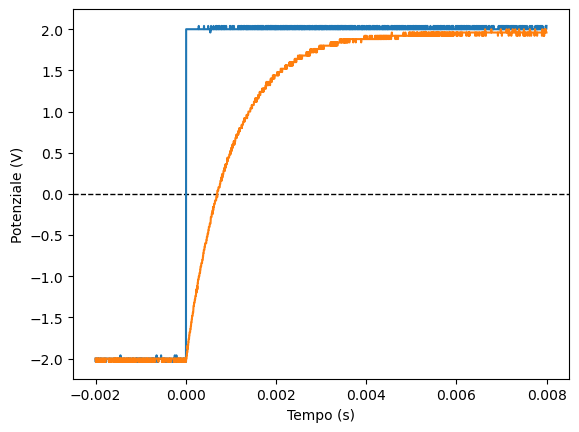

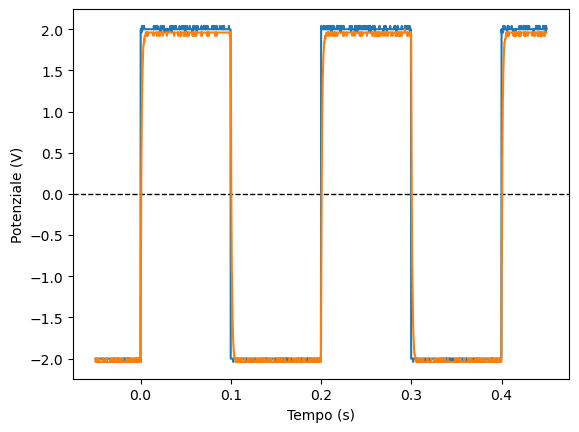

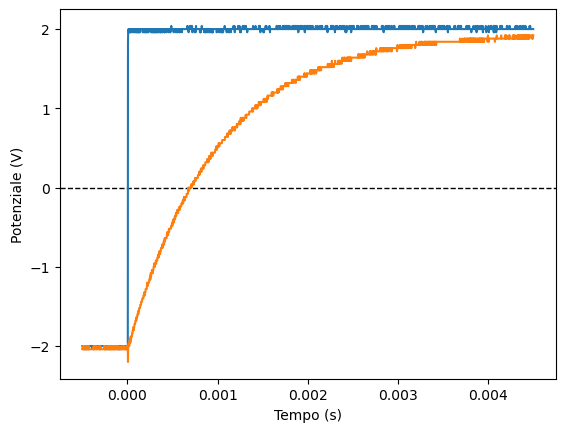

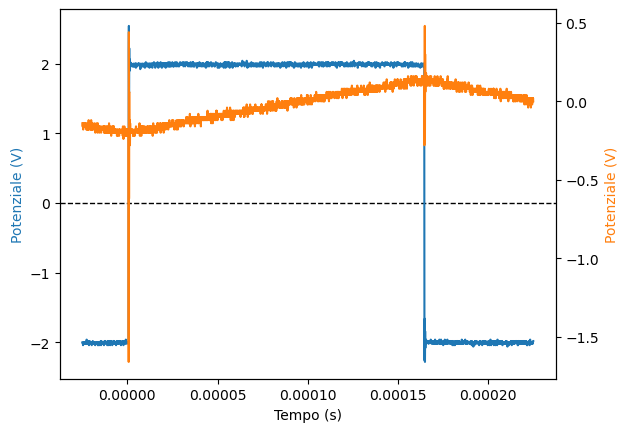

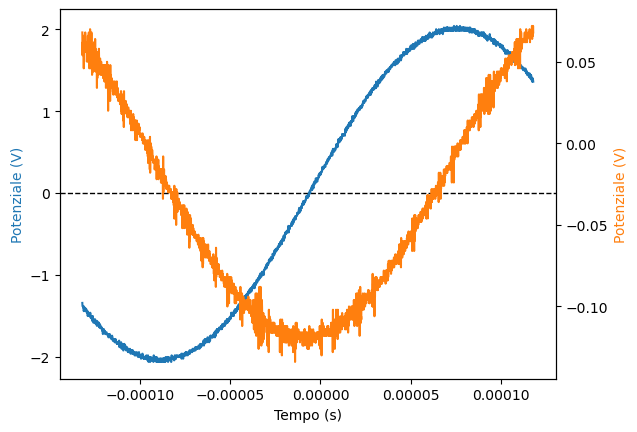

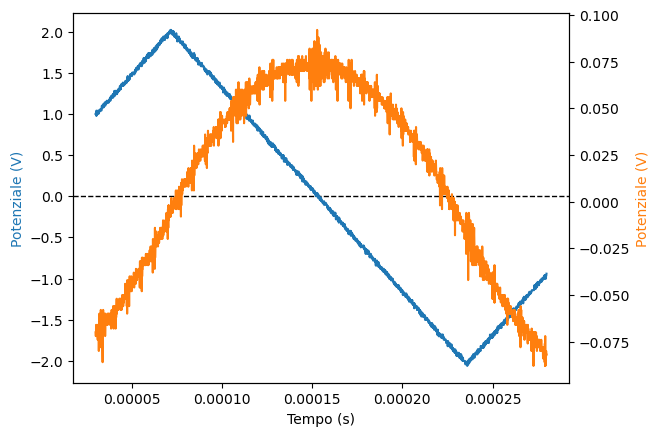

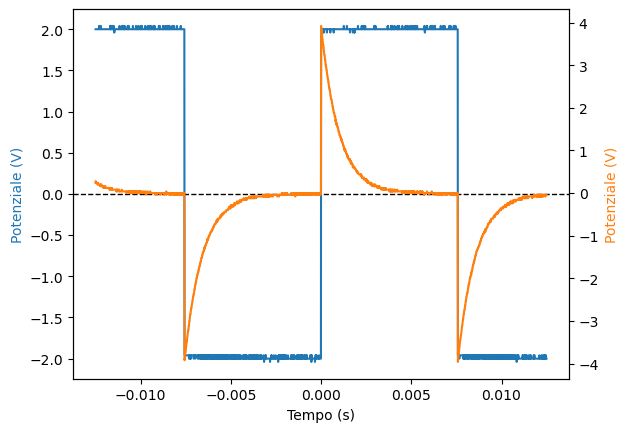

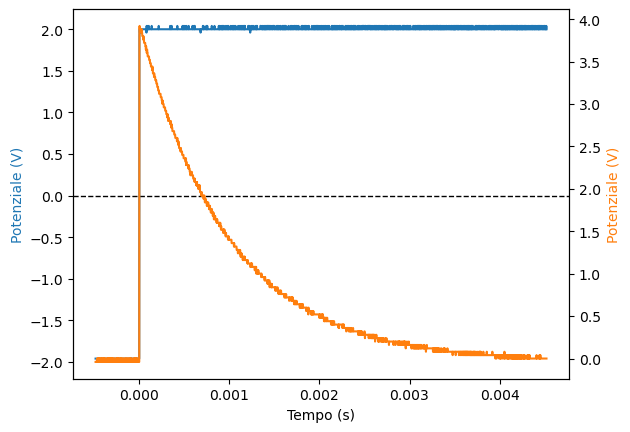

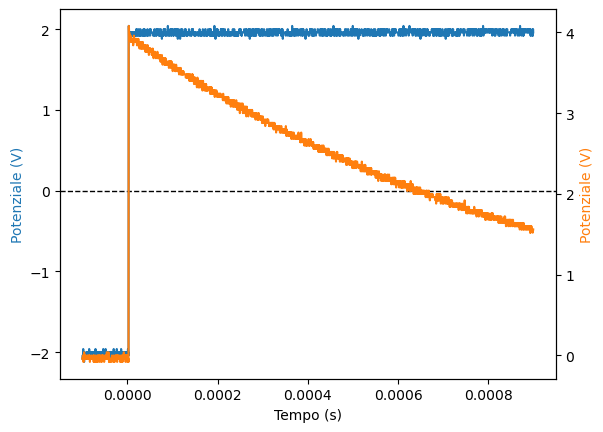

In [ ]:
for i, (ch1, ch2) in enumerate(files):
    if i in {3, 5, 8, 12, 13}: continue
    ch1 = ch1[[3, 4]]
    ch2 = ch2[[3, 4]]
    fig, ax1 = plt.subplots()
    ax1.set_xlabel("Tempo (s)")
    if i < 4:
        ax2 = ax1
        ax1.set_ylabel("Potenziale (V)")
    else:
        ax2 = ax1.twinx()
        ax1.set_ylabel("Potenziale (V)", color="C0")
        ax2.set_ylabel("Potenziale (V)", color="C1")
    ax1.axhline(0, color="0.0", linestyle="--", linewidth=1, rasterized=True)
    ax1.plot(ch1[3], ch1[4], color="C0")
    ax2.plot(ch2[3], ch2[4], color="C1")
    plt.show()
    fig.tight_layout()
    fig.savefig(f"img/{i}.png", dpi=300)
    # if i == 1:
    #     break